# 08차시: [실습] 국내 주식 데이터 수집 및 기본 분석

## 학습 목표
- FinanceDataReader 라이브러리로 실제 KOSPI 데이터 수집
- Pandas로 기본 통계량 확인 및 분석
- 여러 종목 비교 분석 (로그 스케일, 정규화)

## 학습 내용
1. FinanceDataReader 라이브러리 소개 및 설치
2. 단일 종목 데이터 수집 (삼성전자)
3. Pandas 기본 통계량 분석
4. 일별 수익률 계산
5. 여러 종목 데이터 수집
6. 로그 스케일 비교
7. 정규화 비교 (최초가=1)

In [1]:
# 라이브러리 설치
!pip install -q finance-datareader koreanize-matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.dates as mdates
from matplotlib import gridspec
from datetime import datetime, timedelta

---
## 1. FinanceDataReader 라이브러리 소개

### FinanceDataReader란?
- 주가 데이터를 수집하는 파이썬 라이브러리
- 별도의 API 키 없이 무료로 사용 가능
- KOSPI, KOSDAQ, ETF 등 다양한 데이터 제공

### 주요 함수
| 함수 | 설명 |
|------|------|
| `fdr.DataReader()` | 특정 종목의 OHLCV 데이터 |
| `fdr.StockListing('KRX')` | 종목 리스트 |

---
## 2. 단일 종목 데이터 수집 (삼성전자)

FinanceDataReader를 사용하여 삼성전자의 최근 6개월 주가 데이터를 수집합니다.

In [3]:
import FinanceDataReader as fdr

df_krx = fdr.StockListing('KRX')
STOCK_NAMES = dict(zip(df_krx['Code'], df_krx['Name']))

# 삼성전자 주가 데이터 수집
print("[삼성전자 주가 데이터 수집]")
print("=" * 60)

# 날짜 범위 설정 (최근 6개월)
end_date = datetime.now()
start_date = end_date - timedelta(days=180)

# FDR은 datetime 객체 직접 사용 가능
start_str = start_date.strftime('%Y-%m-%d')
end_str = end_date.strftime('%Y-%m-%d')

# 삼성전자 종목코드
ticker = "005930"
stock_name = STOCK_NAMES.get(ticker, ticker)  # 딕셔너리에 없으면 종목코드 그대로 사용

# OHLCV 데이터 수집
df = fdr.DataReader(ticker, start_date, end_date)

print(f"종목명: {stock_name}")
print(f"종목코드: {ticker}")
print(f"조회 기간: {start_str} ~ {end_str}")
print(f"데이터 수: {len(df)}개 (거래일 기준)")
print(f"\n컬럼: {df.columns.tolist()}")
print(f"\n처음 5개 데이터:")
df.head()

[삼성전자 주가 데이터 수집]
종목명: 삼성전자
종목코드: 005930
조회 기간: 2025-07-11 ~ 2026-01-07
데이터 수: 119개 (거래일 기준)

컬럼: ['Open', 'High', 'Low', 'Close', 'Volume', 'Change']

처음 5개 데이터:


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2025-07-14,62300,62600,61800,62500,13563846,-0.001597
2025-07-15,62300,63800,62000,63700,18442202,0.019200
2025-07-16,63700,64700,63100,64700,23042660,0.015699
2025-07-17,65900,66800,64400,66700,39448683,0.030912
2025-07-18,67000,67800,66300,67100,23951531,0.005997


In [4]:
# 데이터 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2025-07-14 to 2026-01-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    119 non-null    int64  
 1   High    119 non-null    int64  
 2   Low     119 non-null    int64  
 3   Close   119 non-null    int64  
 4   Volume  119 non-null    int64  
 5   Change  119 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.5 KB


---
## 3. Pandas 기본 통계량 분석

`describe()`와 다양한 Pandas 함수를 사용하여 데이터를 분석합니다.

In [5]:
# 기술 통계량 (describe)
df[['Open', 'High', 'Low', 'Close', 'Volume']].describe().round(0)

,Open,High,Low,Close,Volume
count,119.0,119.0,119.0,119.0,119.0
mean,89192.0,90434.0,88029.0,89390.0,21162775.0
std,18165.0,18709.0,17775.0,18426.0,8955926.0
min,62300.0,62600.0,61800.0,62500.0,8080910.0
25%,71000.0,71650.0,70150.0,70600.0,14705223.0
50%,92300.0,94500.0,90700.0,93300.0,19908805.0
75%,103250.0,104050.0,101800.0,102950.0,24054864.0
max,143500.0,144400.0,137600.0,141000.0,54824564.0


In [6]:
# 주요 통계량 직접 계산
print("\n[2] 주요 통계량]")
print("=" * 60)

print(f"\n[가격 관련]")
print(f"  - 시작가 (첫 날 종가): {df['Close'].iloc[0]:,}원")
print(f"  - 현재가 (마지막 종가): {df['Close'].iloc[-1]:,}원")
print(f"  - 평균가: {df['Close'].mean():,.0f}원")
print(f"  - 중앙값: {df['Close'].median():,.0f}원")

print(f"\n[최고/최저]")
print(f"  - 최고가: {df['Close'].max():,}원 ({df['Close'].idxmax().strftime('%Y-%m-%d')})")
print(f"  - 최저가: {df['Close'].min():,}원 ({df['Close'].idxmin().strftime('%Y-%m-%d')})")
print(f"  - 변동폭: {df['Close'].max() - df['Close'].min():,}원")

print(f"\n[거래량 관련]")
print(f"  - 평균 거래량: {df['Volume'].mean():,.0f}주")
print(f"  - 최대 거래량: {df['Volume'].max():,}주 ({df['Volume'].idxmax().strftime('%Y-%m-%d')})")

print(f"\n[기간 수익률]")
period_return = ((df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1) * 100
print(f"  - 기간 수익률: {period_return:+.2f}%")


[2] 주요 통계량]

[가격 관련]
  - 시작가 (첫 날 종가): 62,500원
  - 현재가 (마지막 종가): 141,000원
  - 평균가: 89,390원
  - 중앙값: 93,300원

[최고/최저]
  - 최고가: 141,000원 (2026-01-07)
  - 최저가: 62,500원 (2025-07-14)
  - 변동폭: 78,500원

[거래량 관련]
  - 평균 거래량: 21,162,775주
  - 최대 거래량: 54,824,564주 (2025-10-31)

[기간 수익률]
  - 기간 수익률: +125.60%


---
## 4. 일별 수익률 계산

`pct_change()`를 사용하여 일별 수익률을 계산하고 분석합니다.

In [7]:
# 일별 수익률 계산
print("[일별 수익률 분석]")
print("=" * 60)

# 수익률 계산 (전일 대비 변화율)
df['수익률'] = df['Close'].pct_change() * 100

print("\n[일별 수익률 통계]")
print(f"  - 평균 일별 수익률: {df['수익률'].mean():.3f}%")
print(f"  - 수익률 표준편차: {df['수익률'].std():.3f}%")
print(f"  - 최대 상승: {df['수익률'].max():.2f}% ({df['수익률'].idxmax().strftime('%Y-%m-%d')})")
print(f"  - 최대 하락: {df['수익률'].min():.2f}% ({df['수익률'].idxmin().strftime('%Y-%m-%d')})")

[일별 수익률 분석]

[일별 수익률 통계]
  - 평균 일별 수익률: 0.723%
  - 수익률 표준편차: 2.505%
  - 최대 상승: 7.47% (2026-01-05)
  - 최대 하락: -5.77% (2025-11-21)



[수익률 분포 히스토그램]


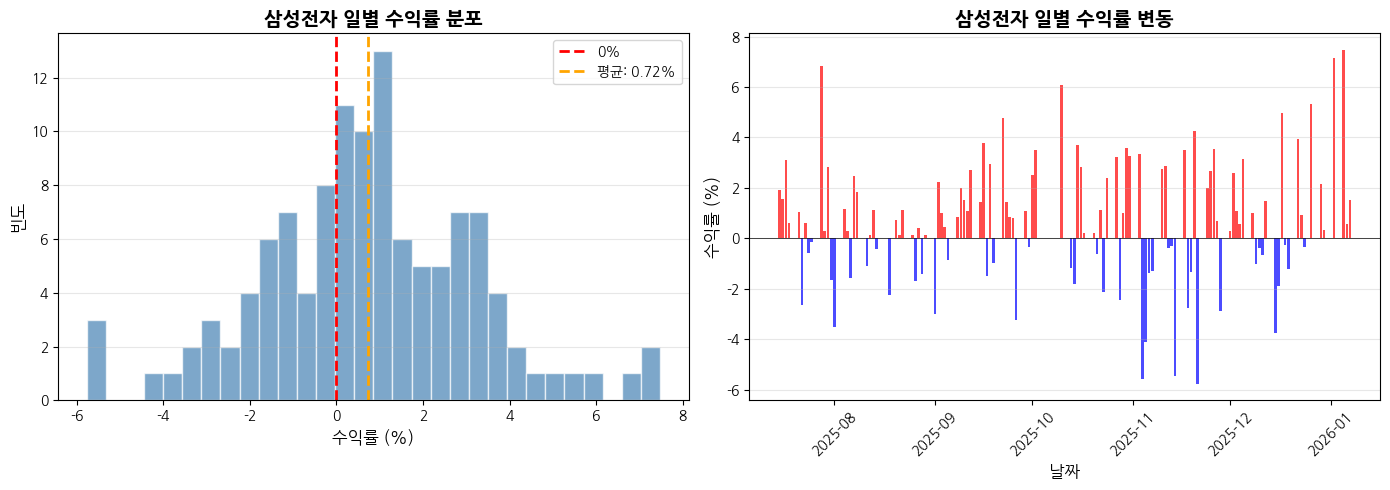

In [8]:
# 수익률 분포 시각화
print("\n[수익률 분포 히스토그램]")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (1) 히스토그램
axes[0].hist(df['수익률'].dropna(), bins=30, color='steelblue', edgecolor='white', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='0%')
axes[0].axvline(x=df['수익률'].mean(), color='orange', linestyle='--', linewidth=2, label=f'평균: {df["수익률"].mean():.2f}%')
axes[0].set_title(f'{stock_name} 일별 수익률 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('수익률 (%)', fontsize=12)
axes[0].set_ylabel('빈도', fontsize=12)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# (2) 시계열 수익률
axes[1].bar(df.index, df['수익률'], color=['red' if x >= 0 else 'blue' for x in df['수익률']], alpha=0.7)
axes[1].axhline(y=0, color='black', linewidth=0.5)
axes[1].set_title(f'{stock_name} 일별 수익률 변동', fontsize=14, fontweight='bold')
axes[1].set_xlabel('날짜', fontsize=12)
axes[1].set_ylabel('수익률 (%)', fontsize=12)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[1].xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## 5. 여러 종목 데이터 수집

삼성전자, SK하이닉스, NAVER 3개 종목의 데이터를 수집합니다.

In [9]:
# 여러 종목 데이터 수집
print("[여러 종목 데이터 수집]")
print("=" * 60)

# 비교할 종목 리스트
tickers = {
    '005930': '삼성전자',
    '000660': 'SK하이닉스',
    '035420': 'NAVER'
}

# 각 종목 데이터 수집
stocks_data = {}

for ticker, name in tickers.items():
    df_stock = fdr.DataReader(ticker, start_date, end_date)
    stocks_data[name] = df_stock
    print(f"  - {name} ({ticker}): {len(df_stock)}개 데이터 수집 완료")

[여러 종목 데이터 수집]
  - 삼성전자 (005930): 119개 데이터 수집 완료
  - SK하이닉스 (000660): 119개 데이터 수집 완료
  - NAVER (035420): 119개 데이터 수집 완료


In [10]:
# 각 종목 현재가 확인
print("\n[각 종목 현재가 및 기간 수익률]")
print("=" * 60)

for name, df_stock in stocks_data.items():
    start_price = df_stock['Close'].iloc[0]
    end_price = df_stock['Close'].iloc[-1]
    return_pct = ((end_price / start_price) - 1) * 100
    print(f"  - {name}: {end_price:,}원 (기간 수익률: {return_pct:+.2f}%)")


[각 종목 현재가 및 기간 수익률]
  - 삼성전자: 141,000원 (기간 수익률: +125.60%)
  - SK하이닉스: 738,000원 (기간 수익률: +146.00%)
  - NAVER: 251,500원 (기간 수익률: +1.00%)


---
## 6. 로그 스케일(Log Scale) 비교

주가 수준이 다른 종목들을 비교할 때 로그 스케일을 사용하면 변동률을 비교하기 쉽습니다.

### 로그 스케일의 특징
- 같은 거리 = 같은 비율 변화
- 예: 10원 → 20원 (100% 상승)과 100원 → 200원 (100% 상승)이 같은 폭으로 표시됨
- 가격 수준이 다른 종목 간 변동률 비교에 유용

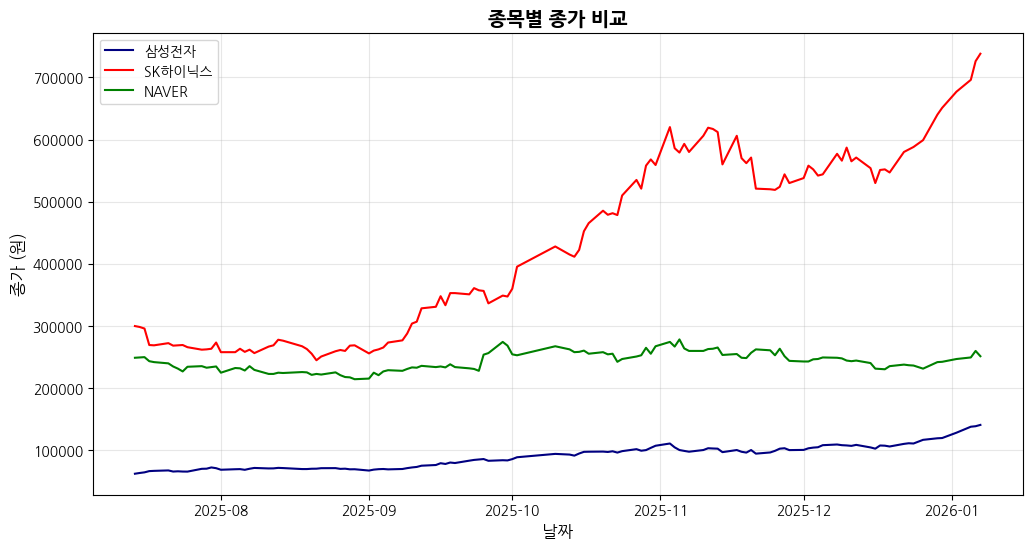

[일반 스케일의 특징]
  - 종목 간 절대적인 가격 수준 차이를 직관적으로 비교 가능
  - 고가 종목의 변동이 더 크게, 저가 종목의 변동은 작게 보일 수 있음


In [11]:
# 일반 스케일 종가 비교 차트

fig, ax = plt.subplots(figsize=(12, 6))

# 색상 설정
colors = ['navy', 'red', 'green']

# 종목별 종가 비교 (일반 스케일)
for i, (name, df_stock) in enumerate(stocks_data.items()):
    ax.plot(df_stock.index, df_stock['Close'], label=name,
        color=colors[i],  linewidth=1.5)

ax.set_title('종목별 종가 비교', fontsize=14, fontweight='bold')
ax.set_ylabel('종가 (원)', fontsize=12)
ax.set_xlabel('날짜', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.show()

print("[일반 스케일의 특징]")
print("  - 종목 간 절대적인 가격 수준 차이를 직관적으로 비교 가능")
print("  - 고가 종목의 변동이 더 크게, 저가 종목의 변동은 작게 보일 수 있음")

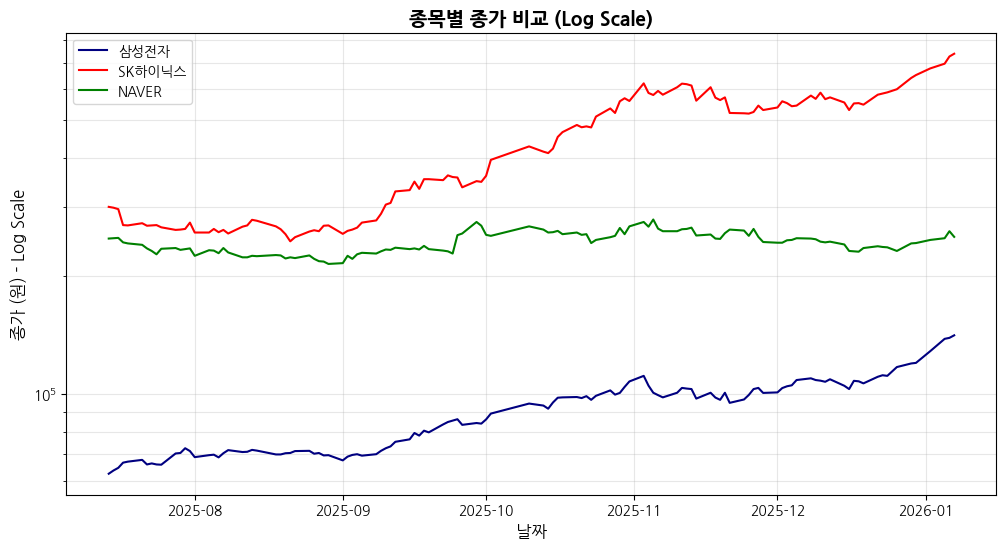

[로그 스케일의 특징]
  - 종목 간 절대 가격 차이보다 변동률(%) 비교에 유리
  - 같은 거리 = 같은 비율 변화 (예: 10→20과 100→200)


In [12]:
# 로그 스케일 종가 비교 차트 (거래량 제거)

fig, ax = plt.subplots(figsize=(12, 6))

# 색상 설정
colors = ['navy', 'red', 'green']

# 종목별 종가 비교 (로그 스케일)
for i, (name, df_stock) in enumerate(stocks_data.items()):
    ax.plot(df_stock.index, df_stock['Close'], label=name,
        color=colors[i],  linewidth=1.5)

# 로그 스케일 적용
ax.set_yscale('log')

# 차트 설정
ax.set_title('종목별 종가 비교 (Log Scale)', fontsize=14, fontweight='bold')
ax.set_ylabel('종가 (원) - Log Scale', fontsize=12)
ax.set_xlabel('날짜', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3, which='both')  # 로그 스케일에서는 both 권장

plt.show()

print("[로그 스케일의 특징]")
print("  - 종목 간 절대 가격 차이보다 변동률(%) 비교에 유리")
print("  - 같은 거리 = 같은 비율 변화 (예: 10→20과 100→200)")

---
## 7. 정규화 비교 (최초가 = 100 기준)

서로 다른 가격대의 종목들을 비교하기 위해 시작일의 가격을 1 로 맞춰 상대적 성과를 비교합니다.

### 정규화 공식
```
정규화 가격 = (현재 종가 / 시작일 종가)
```

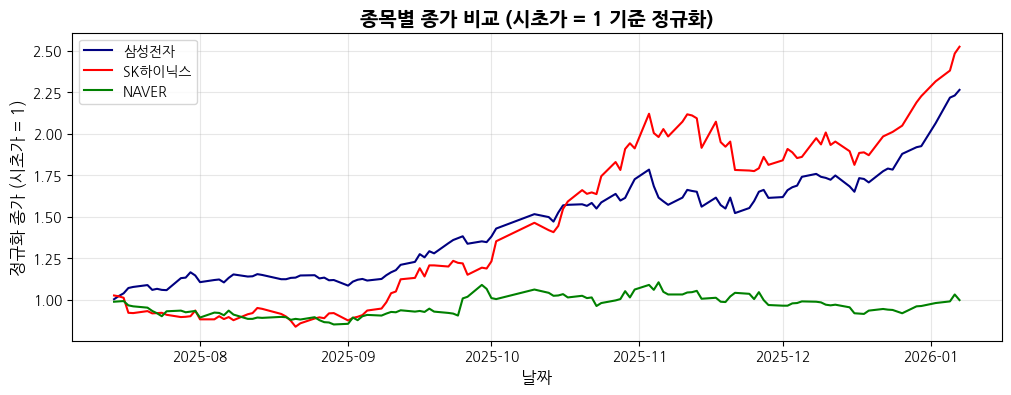

[정규화 차트의 해석]
  - 모든 종목의 시작점을 1로 맞춰 성과(수익률)를 비교
  - 1.10 → +10%, 0.95 → -5% 의미
  - 가격 수준이 다른 종목 간 성과 비교에 매우 적합


In [13]:
# 시초가 기준 정규화 종가 비교 차트

fig, ax = plt.subplots(figsize=(12, 4))

# 색상 설정
colors = ['navy', 'red', 'green']

# 종목별 정규화 종가 비교
for i, (name, df_stock) in enumerate(stocks_data.items()):

    # 각 종목의 첫 날 시초가(Open)를 기준값으로 설정
    base_open = df_stock['Open'].iloc[0]

    # 종가를 시초가로 나누어 정규화 (시초가 = 1)
    normalized_close = df_stock['Close'] / base_open

    ax.plot(df_stock.index, normalized_close,
        label=name, color=colors[i], linewidth=1.5)

ax.set_title('종목별 종가 비교 (시초가 = 1 기준 정규화)', fontsize=14, fontweight='bold')
ax.set_ylabel('정규화 종가 (시초가 = 1)', fontsize=12)
ax.set_xlabel('날짜', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.show()

print("[정규화 차트의 해석]")
print("  - 모든 종목의 시작점을 1로 맞춰 성과(수익률)를 비교")
print("  - 1.10 → +10%, 0.95 → -5% 의미")
print("  - 가격 수준이 다른 종목 간 성과 비교에 매우 적합")

---
## 학습 정리

### 1. FinanceDataReader 데이터 수집
- `fdr.DataReader()`: OHLCV 데이터 수집
- `fdr.StockListing('KRX')`: 종목명 조회
- 날짜 형식: `'YYYYMMDD'` (문자열)

### 2. Pandas 통계 분석
- `describe()`: 기술 통계량
- `pct_change()`: 변화율 계산
- `idxmax()`, `idxmin()`: 최대/최소값 인덱스

### 3. 여러 종목 비교
- **로그 스케일**: 가격 수준이 다른 종목의 변동률 비교
- **정규화**: 최초가=1 기준으로 상대 성과 비교

### 핵심 포인트
1. FinanceDataReader는 API 키 없이 무료로 사용 가능
2. 로그 스케일: 같은 거리 = 같은 비율 변화
3. 정규화: 시작점을 맞춰 상대 성과 비교

---

### 다음 차시 예고
- 09차시: 이동평균으로 금융 시계열 추세 분석
  - 단순/지수 이동평균
  - 골든크로스, 데드크로스